In [21]:
import math
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
dataset = pd.read_csv('ads_ctr_optimizations.csv')

In [23]:
dataset.iloc[:5, :]

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [26]:
N: int = 1500 #len(dataset.index)
d: int = len(dataset.columns)

ads_selected: list = []
num_of_selections: list = [0] * d
num_of_rewards_pos: list = [0] * d
num_of_rewards_neg: list = [0] * d
total_reward: int  = 0

for n in range(N):
    ad_idx: int = 0
    max_random: int = 0
    for idx in range(d):
        # for each ad "idx", we take a random draw from a Beta distrubotion
        random_beta = random.betavariate(num_of_rewards_pos[idx] + 1, num_of_rewards_neg[idx] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad_idx = idx
    ads_selected.append(ad_idx)
    reward = dataset.values[n, ad_idx]
    if reward == 1:
        num_of_rewards_pos[ad_idx] += num_of_rewards_pos[ad_idx] + 1
    else:
        num_of_rewards_neg[ad_idx] += num_of_rewards_neg[ad_idx] + 1
    total_reward += reward

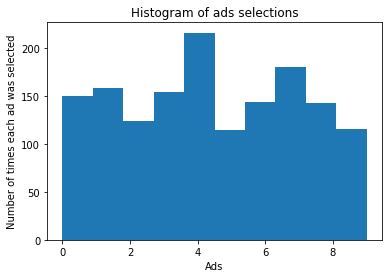

In [27]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()